# Understanding the Fourier Transform by example
How to implement the Fast Fourier Transform algorithm in Python from scratch. <br />
@author: Simon J. Buehrer <br />
@date: 2021-02-04 <br /><br />
**Links:**
<ul>
<li> https://towardsdatascience.com/fast-fourier-transform-937926e591cb </li>
<li> https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/ </li>
<li> https://towardsdatascience.com/analyzing-seasonality-with-fourier-transforms-using-python-scipy-bb46945a23d3 </li>
</ul> 

In [87]:
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
import datetime as dt 

import yfinance as yf #pip install yfinance /or pip3 /or conda
import numpy as np
# Packages for measuring model performance / errors
from sklearn.linear_model import LinearRegression
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates


ModuleNotFoundError: No module named 'sklearn'

## get data

In [77]:
#get current day and download hist. data (today-1000)
today = dt.datetime.today().strftime('%Y-%m-%d')
hist = (dt.datetime.today()-dt.timedelta(1000)).strftime('%Y-%m-%d')

stockname='ABB'
print(today,hist)
stockdata_df = yf.download(stockname, start=hist, end=today)
print(stockdata_df.head(5))

2021-02-04 2018-05-11
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-05-10  23.870001  24.049999  23.840000  24.040001  22.120333  1068000
2018-05-11  24.070000  24.129999  23.959999  23.990000  22.074324  1023600
2018-05-14  23.860001  23.990000  23.830000  23.900000  21.991512  1201400
2018-05-15  23.700001  23.870001  23.620001  23.820000  21.917900  1309400
2018-05-16  24.000000  24.080000  23.879999  23.910000  22.000711  1601200


## viusalize data

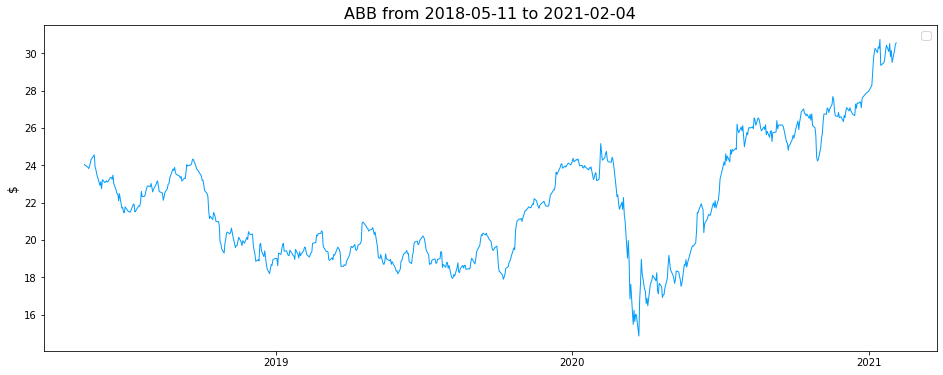

In [83]:
# Plotting the data
register_matplotlib_converters()
years = mdates.YearLocator() 
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)
x = stockdata_df.index
y = stockdata_df['Close']
#ax1.fill_between(x, 0, y, color='#b9e1fa')
ax1.legend([stockname], fontsize=12)
plt.title(stockname + ' from '+ hist + ' to ' + today, fontsize=16)
plt.plot(y, color='#039dfc', label=stockname, linewidth=1.0)
plt.ylabel('$', fontsize=12)
plt.show()

## Calculating the residuals

In [85]:
# time_sec is the hourly timestamp converted to seconds
X = pd.DataFrame(stockdata_df.index) 
# signal is how many calls were made in that hour
y = pd.DataFrame(stockdata_df['Close'])

model = LinearRegression()
model.fit(X, y) 
data['pred_signal_linreg'] = model.predict(X)
data['residuals'] = data['signal'] - data['pred_signal_linreg']


NameError: name 'LinearRegression' is not defined